In [5]:
import os

# --- Add these lines at the very top of your script ---
# This must be done BEFORE importing numpy or other scientific libraries.
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['VECLIB_MAXIMUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'

import numpy as np
import multiprocessing
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import product
import time
from device import Device

from hamiltonian import Hamiltonian
from device import Device

import scipy as sp
from hamiltonian import Hamiltonian
from helper import Helper_functions
import scipy.sparse as spa
import numpy as np
import scipy.sparse as sp
from lead_self_energy import LeadSelfEnergy
from scipy.sparse import bmat, identity, random, csc_matrix
from scipy.sparse.linalg import eigsh, eigs, spsolve
import time
from charge import Charge

In [6]:
dev = Device(2e-9, 1e-9)
ham = Hamiltonian(dev)
lse = LeadSelfEnergy(dev, ham)
chargeObj = Charge(dev)
energy_range = np.linspace(-10, 10, 150)



In [24]:
lse.self_energy("left", 0, 0,"sancho_rubio") - lse.self_energy("left", 0, 0,"transfer")

array([[-1.99840144e-15-4.65868121e-21j,  2.33146835e-15+1.67289007e-20j,
         1.55431223e-15+2.54109884e-21j, ...,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
       [ 1.44328993e-15+5.08219768e-21j, -1.33226763e-15-1.27054942e-20j,
        -1.66533454e-15-1.37642854e-21j, ...,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
       [ 2.44249065e-15+3.81164826e-21j, -2.55351296e-15-1.43995601e-20j,
        -1.88737914e-15-3.38813179e-21j, ...,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
       ...,
       [ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, ...,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
       [ 0.00000000e+00+0.00000000e+00j,  0.

Calculating DOS with 150 energy points and 32 ky points
Using sancho_rubio method for surface Green's functions
Starting DOS calculations for 4800 (E, ky) pairs...
DOS calculation completed in 82.33 seconds
DOS data saved to dos_data.txt


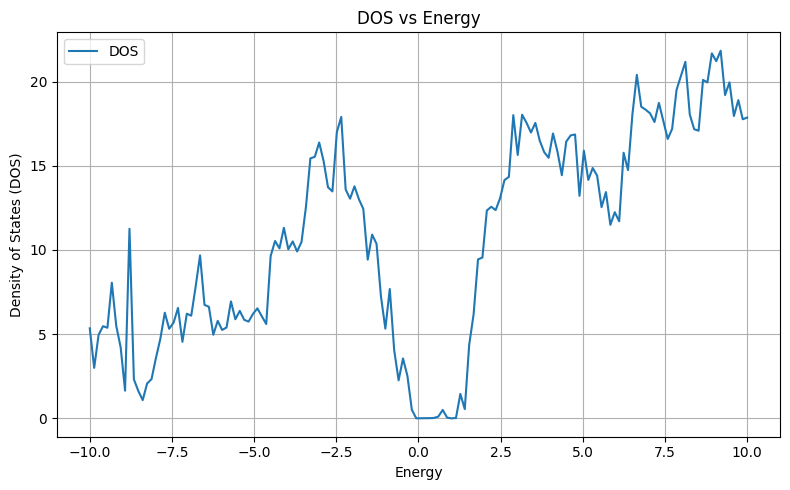

In [3]:
# Use chargeObj to calculate DOS over energy_range
energy_range, dos = chargeObj.calculate_DOS(energy_range = energy_range)  # Should return an array of DOS values for energy_range

plt.figure(figsize=(8, 5))
plt.plot(energy_range, dos, label='DOS')
plt.xlabel('Energy')
plt.ylabel('Density of States (DOS)')
plt.title('DOS vs Energy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
N_atoms = len(ham.unitCell.ATOM_POSITIONS)
LDOS = np.zeros(N_atoms)

for e in energy_range:
    L = chargeObj.calculate_LDOS(e)
    ldos = L.values()
    print(ldos)
    LDOS += list(ldos) 

In [ ]:
total_LDOS_per_atom = {}
for atom, ld in zip(ham.unitCell.ATOM_POSITIONS, LDOS):
    total_LDOS_per_atom[atom] = ld
print(total_LDOS_per_atom)

In [ ]:


LDOS = np.zeros((dev.nx, dev.nz))

for e in energy_range:
    L = chargeObj.calculate_LDOS(e)
    D = chargeObj.unsmear_to_smear(L)
    LDOS += D

In [ ]:
LDOS / 100
def plot_2d_array(data, Lx, Lz):

    if not isinstance(data, np.ndarray) or data.ndim != 2:
        raise ValueError("Input 'data' must be a 2D numpy array.")
    
    print(f"Plotting array of shape {data.shape} over domain X=[0, {Lx}], Z=[0, {Lz}]")
    plt.figure(figsize=(10, 6))

    im = plt.imshow(data, extent=[0, Lx, 0, Lz], origin='lower', aspect='auto', cmap='viridis')

    plt.colorbar(im, label='LDOS')

    plt.xlabel(f'X-axis (0 to {Lx})')
    plt.ylabel(f'Z-axis (0 to {Lz})')
    plt.title('2D Array Visualization')
    plt.tight_layout()

    plt.show()

plot_2d_array(LDOS, 2e-9, 1e-9)

In [ ]:
dev = Device(2e-9, 1e-9)
ham = Hamiltonian(dev)
chargeObj = Charge(dev)
energy_range = np.linspace(-10, 10, 150)


In [ ]:
LDOS = chargeObj.calculate_smeared_LDOS(1)

In [ ]:
def plot_2d_array(data, Lx, Lz):

    if not isinstance(data, np.ndarray) or data.ndim != 2:
        raise ValueError("Input 'data' must be a 2D numpy array.")
    
    print(f"Plotting array of shape {data.shape} over domain X=[0, {Lx}], Z=[0, {Lz}]")
    plt.figure(figsize=(10, 6))

    im = plt.imshow(data, extent=[0, Lx, 0, Lz], origin='lower', aspect='auto', cmap='viridis')

    plt.colorbar(im, label='LDOS')

    plt.xlabel(f'X-axis (0 to {Lx})')
    plt.ylabel(f'Z-axis (0 to {Lz})')
    plt.title('2D Array Visualization')
    plt.tight_layout()

    plt.show()

plot_2d_array(LDOS, 2e-9, 1e-9)

In [ ]:
electrons = chargeObj.calculate_total_electron_density()

In [ ]:
electrons